**Bank Customer churn prediction model**

We will predict whether the customer exits the bank or not

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/content/Churn_Modelling.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [6]:
data.shape

(10000, 14)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
data.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [9]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
data.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [11]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [12]:
data = data.drop(columns=['RowNumber','CustomerId','Surname'],axis=1)

In [13]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
#encoding categorical features
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [15]:
data.replace({'Geography':{'France':2,'Germany':1,'Spain':0}},inplace=True)

In [16]:
data.replace({'Gender':{'Male':0,'Female':1}},inplace=True)

In [17]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,2,1,42,2,0.00,1,1,1,101348.88,1
1,608,0,1,41,1,83807.86,1,0,1,112542.58,0
2,502,2,1,42,8,159660.80,3,1,0,113931.57,1
3,699,2,1,39,1,0.00,2,0,0,93826.63,0
4,850,0,1,43,2,125510.82,1,1,1,79084.10,0


In [18]:
data['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


<Axes: xlabel='Exited', ylabel='count'>

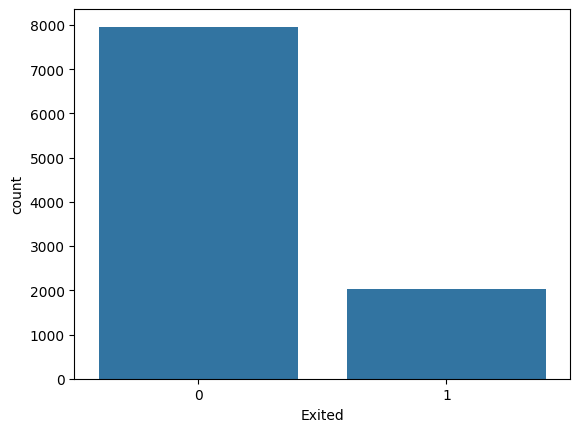

In [20]:
import seaborn as sns
sns.countplot(x='Exited',data=data)

so its an imbalanced dataset

In [21]:
X = data.drop('Exited',axis=1)

In [22]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,2,1,42,2,0.00,1,1,1,101348.88
1,608,0,1,41,1,83807.86,1,0,1,112542.58
2,502,2,1,42,8,159660.80,3,1,0,113931.57
3,699,2,1,39,1,0.00,2,0,0,93826.63
4,850,0,1,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,2,0,39,5,0.00,2,1,0,96270.64
9996,516,2,0,35,10,57369.61,1,1,1,101699.77
9997,709,2,1,36,7,0.00,1,0,1,42085.58
9998,772,1,0,42,3,75075.31,2,1,0,92888.52


In [23]:
y = data['Exited']

Handling imbalanced data with SMOTE

In [39]:
from imblearn.over_sampling import SMOTE

In [40]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [41]:
y_res.value_counts()

,count
Exited,
1,7963
0,7963


In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.20,random_state=42)

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
sc = StandardScaler()

In [46]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Logistic Regression**

In [47]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [48]:
y_pred = log.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

In [33]:
accuracy_score(y_test,y_pred)

0.805

In [50]:
accuracy_score(y_test,y_pred) #after applying SMOTE

0.753609541745135

In [34]:
confusion_matrix(y_test,y_pred)

array([[1552,   41],
       [ 349,   58]])

In [51]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [36]:
precision_score(y_test,y_pred)

0.5858585858585859

In [52]:
precision_score(y_test,y_pred) #after applying SMOTE

0.7385093167701864

In [37]:
recall_score(y_test,y_pred)

0.14250614250614252

In [53]:
recall_score(y_test,y_pred) #after SMOTE

0.7656149388280747

In [38]:
f1_score(y_test,y_pred)

0.22924901185770755

In [54]:
f1_score(y_test,y_pred) #after applying SMOTE

0.7518178944040468

**SVC**

In [55]:
from sklearn import svm

In [56]:
svm = svm.SVC()

In [57]:
svm.fit(X_train,y_train)

SVC()

In [58]:
y_pred2 = svm.predict(X_test)

In [59]:
accuracy_score(y_test,y_pred2)

0.8367859384808537

In [60]:
precision_score(y_test,y_pred2)

0.8296107211231653

**KNN**

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
knn = KNeighborsClassifier()

In [63]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [65]:
y_pred3= knn.predict(X_test)

In [66]:
accuracy_score(y_test,y_pred3)

0.8163841807909604

In [67]:
precision_score(y_test,y_pred3)

0.7922705314009661

**Decision Tree classifier**

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
dt = DecisionTreeClassifier()

In [70]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [71]:
y_pred4 = dt.predict(X_test)

In [72]:
accuracy_score(y_test,y_pred4)

0.7940991839296924

In [73]:
precision_score(y_test,y_pred4)

0.7713248638838476

**Random Forest Classifier**

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
rf = RandomForestClassifier()

In [76]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [77]:
y_pred5=rf.predict(X_test)

In [78]:
accuracy_score(y_test,y_pred5)

0.8628374136848713

In [79]:
precision_score(y_test,y_pred5)

0.8554140127388535

In [82]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF'],
                           'ACC':[accuracy_score(y_test,y_pred),
                                  accuracy_score(y_test,y_pred2),
                                  accuracy_score(y_test,y_pred3),
                                  accuracy_score(y_test,y_pred4),
                                  accuracy_score(y_test,y_pred5)
                                  ]})

In [83]:
final_data

,Models,ACC
0,LR,0.753610
1,SVC,0.836786
2,KNN,0.816384
3,DT,0.794099
4,RF,0.862837


**RandomForest is the best model**

<ipython-input-86-c7532373aef2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=final_data['Models'], y=final_data['ACC'], palette=colors)


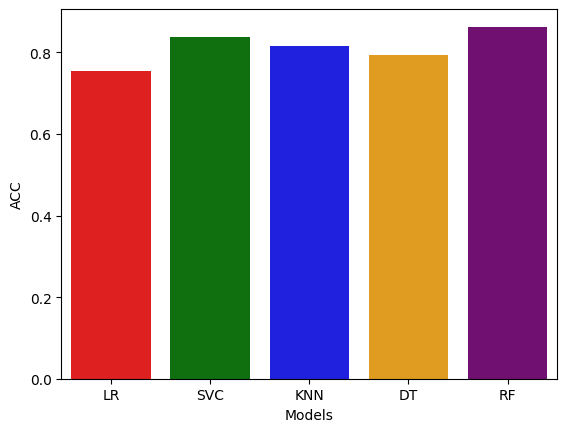

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a list of colors, one for each bar
colors = ["red", "green", "blue", "orange", "purple"]

sns.barplot(x=final_data['Models'], y=final_data['ACC'], palette=colors)
# Use the 'palette' argument to assign colors

plt.show() # Display the plot

SAVE THE MODEL

In [87]:
X_res = sc.fit_transform(X_res)

In [88]:
rf.fit(X_res,y_res)

RandomForestClassifier()

In [89]:
import joblib

In [90]:
joblib.dump(rf,'Churn_Model_predict')

['Churn_Model_predict']

In [92]:
model = joblib.load('Churn_Model_predict')

In [93]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')